In [28]:
import numpy as np 
import pandas as pd
import csv 
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

import os 
os.chdir("/Users/susanchen/Documents/GitHub/skincare_classification/Plots")

In [26]:
data = pd.read_csv('/Users/susanchen/Documents/GitHub/skincare_classification/Data_sets/Master_cleaned.csv')

In [32]:
data

,Product,Brand,Ingredients,Price,Skin Type,Combination,Dry,Normal,Oily,Sensitive,...,num_of_Emollients,num_of_Hydration,num_of_Skin-Restoring,num_of_Plant Extracts,num_of_Preservatives,num_of_Skin-Softening,num_of_Sensitizing,num_of_Skin-Replenishing,top_3,top3_category_list
0,Glycolic Acid 7% Toning Solution,The Ordinary,"Aqua (Water), Glycolic Acid, Rosa Damascena Fl...",8.70,Oily,1,1,1,1,1,...,0,1,0,0,2,0,0,6,"['Glycolic Acid', 'Rosa Damascena Flower Water...","[None, None, None]"
1,The Microdelivery Exfoliating Facial Wash,Philosophy,"Aqua/Water/Eau, Solum Diatomeae/Diatomaceous E...",29.00,Oily,1,1,1,1,1,...,0,0,0,0,3,0,0,2,['Solum Diatomeae/Diatomaceous Earth/Terre De ...,"[None, None, None]"
2,AHA/BHA Exfoliating Cleanser,Murad,"Water (Aqua), Sodium Laureth Sulfate, Cocamido...",40.00,Oily,1,1,1,1,1,...,0,0,0,1,2,0,0,1,"['Sodium Laureth Sulfate', 'Cocamidopropyl Bet...","[None, 'Cleansing Agents', None]"
3,Anti-Aging Cleansing Gel,Peter Thomas Roth,"Water/Aqua/Eau, Sodium Laureth Sulfate, Cocami...",39.00,Oily,1,1,1,1,1,...,0,0,0,0,3,0,0,0,"['Sodium Laureth Sulfate', 'Cocamidopropyl Bet...","[None, 'Cleansing Agents', None]"
4,Hydrating Facial Cleanser,CeraVe,"Purified Water, Glycerin, Behentrimonium Metho...",13.49,Oily,1,1,1,1,1,...,1,0,0,0,3,0,0,1,"['Glycerin', 'Behentrimonium Methosulfate and ...","['Skin-Replenishing, Skin-Restoring', None, None]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2036,Instant Hydration Facial Sheet Mask,Andalou Naturals,"Aloe Barbadensis Leaf Juice*, Purified Water (...",4.99,Sensitive,0,0,0,0,1,...,0,0,0,0,0,0,0,0,"['Boswellia Serrata (boswellin) Extract]', 'Bi...","[None, None, None]"
2037,Prep Cicaronic SOS Ampoules,SNP,"Water, Glycerin, Butylene Glycol, Glycereth-26...",16.00,Sensitive,0,0,0,0,1,...,0,0,0,1,0,0,0,2,"['Glycerin', 'Butylene Glycol', 'Glycereth-26']","['Skin-Replenishing, Skin-Restoring', 'Texture..."
2038,Pro-Collagen Hydra-Gel Eye Mask,ELEMIS,"Aqua/Water/Eau, Glycerin, Ceratonia Siliqua Gu...",76.00,Sensitive,0,0,0,0,1,...,0,0,0,4,1,0,0,2,"['Glycerin', 'Ceratonia Siliqua Gum', 'Carrage...","['Skin-Replenishing, Skin-Restoring', None, None]"
2039,ADVANCED Ceramide Capsules Daily Youth Restori...,Elizabeth Arden,"Cyclopentasiloxane, Isononyl Isononanoate, Iso...",63.00,Sensitive,0,0,0,0,1,...,5,0,0,0,1,0,0,0,"['Isononyl Isononanoate', 'Isododecane', 'Isop...","[None, None, None]"


## Quick Visualization of Prices

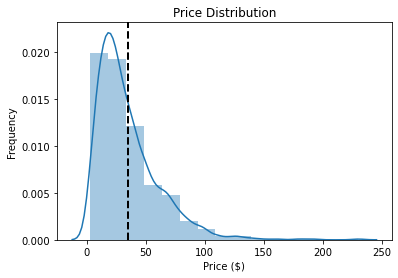

In [128]:
plot1 = sns.distplot(data["Price"], bins = 15)
plt.title('Price Distribution')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.axvline(data['Price'].mean(), color = 'black', linestyle='dashed', linewidth=2)
plt.savefig('Price_distribution.png')

## Skin Type Frequencies

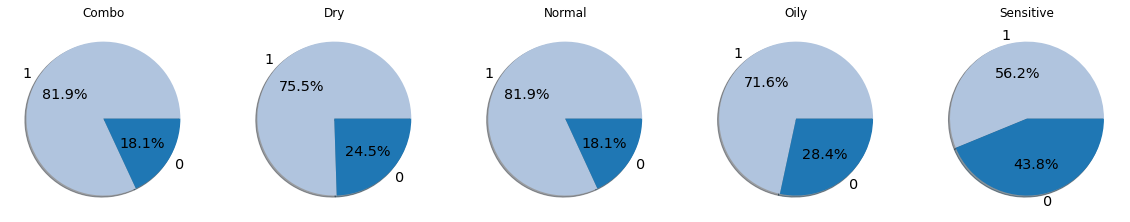

In [135]:
s_type = ["Combination", "Dry", "Normal", "Oily", "Sensitive"]
label = "1", "0"
colors = ["lightsteelblue", "tab:blue"]
plot2, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(1, 5 , figsize = (20,10))
#fig.suptitle('Frequency of each Skin Type')
ax1.pie(data["Combination"].value_counts(1), labels = label, autopct='%1.1f%%', shadow=True, textprops={'size': 'x-large'}, colors = colors)
ax1.set_title("Combo")
ax2.pie(data["Dry"].value_counts(1), labels = label, autopct='%1.1f%%', shadow=True, textprops={'size': 'x-large'}, colors = colors)
ax2.set_title("Dry")
ax3.pie(data["Normal"].value_counts(1), labels = label, autopct='%1.1f%%', shadow=True, textprops={'size': 'x-large'}, colors = colors)
ax3.set_title("Normal")
ax4.pie(data["Oily"].value_counts(1), labels = label, autopct='%1.1f%%', shadow=True, textprops={'size': 'x-large'}, colors = colors)
ax4.set_title("Oily")
ax5.pie(data["Sensitive"].value_counts(1),labels = label, autopct='%1.1f%%', shadow=True, textprops={'size': 'x-large'}, colors = colors)
ax5.set_title("Sensitive")
plt.savefig('Skin_type_frequenct.png')


In [ ]:
Antioxidants
Emollients
Hydration
Skin-Restoring
Plant Extracts
Preservatives
Skin-Softening
Sensitizing
Skin-Replenishing

## Brands in this data set

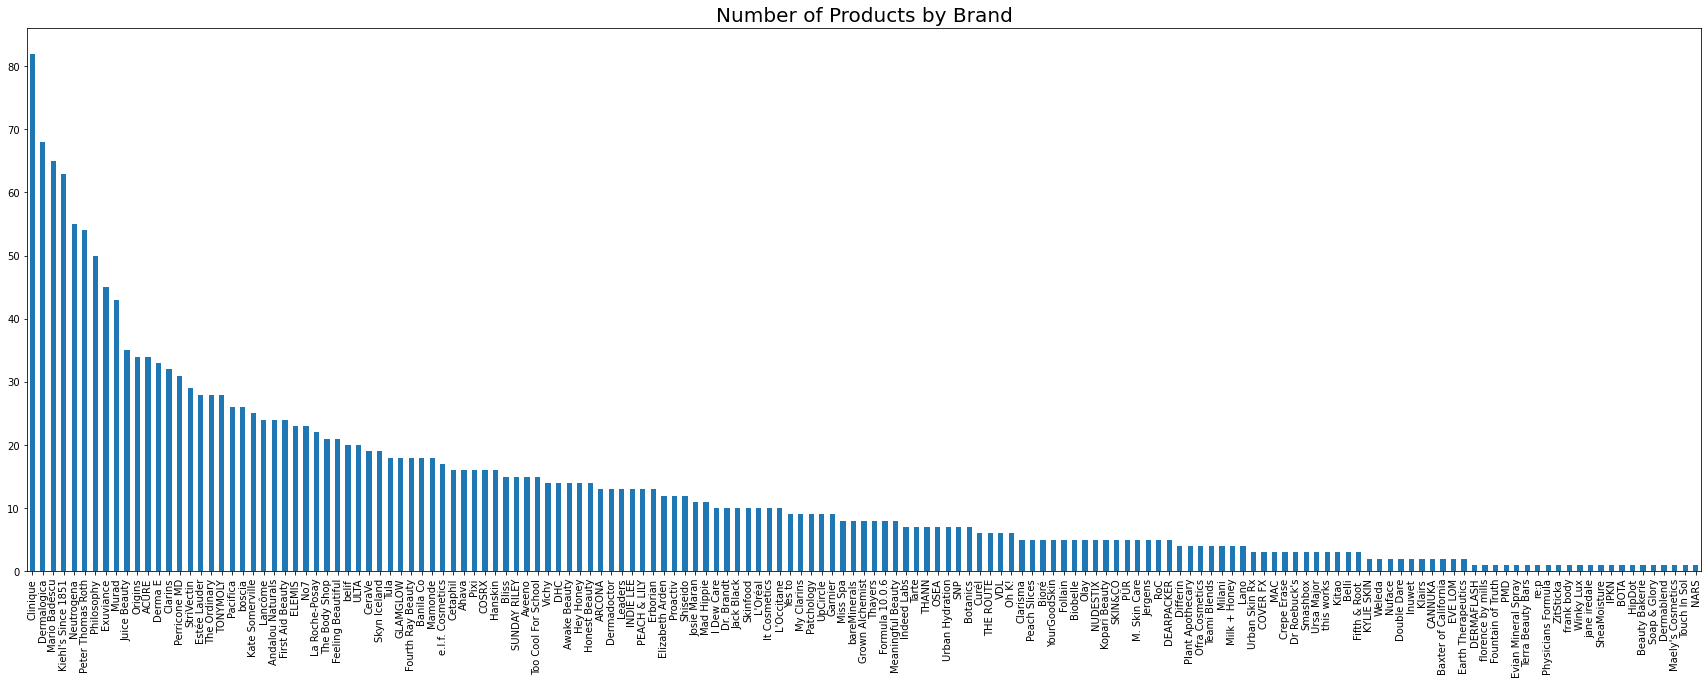

In [194]:
plot3 = data.Brand.value_counts().plot.bar(figsize =(30,10))
plt.title("Number of Products by Brand", fontsize =20)
#for index, value in enumerate(data.Brand.value_counts()):
 #   plt.text(index -.5, value +1, str(value))
plt.savefig('Brands.png')


In [169]:
data['Target'] = (data['Combination'].astype('str') + data['Dry'].astype('str') + data['Normal'].astype('str') + data['Oily'].astype('str') + data["Sensitive"].astype('str'))
data.Target.value_counts()
#data.groupby(s_type).value_counts()

11111    932
11110    240
10110    114
10010     92
00100     84
01000     73
01100     71
11100     67
11101     62
10000     58
00001     46
10100     30
01101     29
00010     25
10111     23
11000     21
01001     19
00101     12
11010     12
10011     10
11001      7
00110      4
11011      4
00011      2
01110      2
01010      1
01111      1
Name: Target, dtype: int64

### Almost half of all products in this data set are suitable for all skin types. Is this suprising? Maybe or maybe not. We do not know how generalizable our data set is of all existing skincare products. It could be that when we scraped the data from Utla, there were more listed products that are good for all skin types than the other categories as listings do change from time to time due to product availability.

## Average number of each ingredient category by skin type

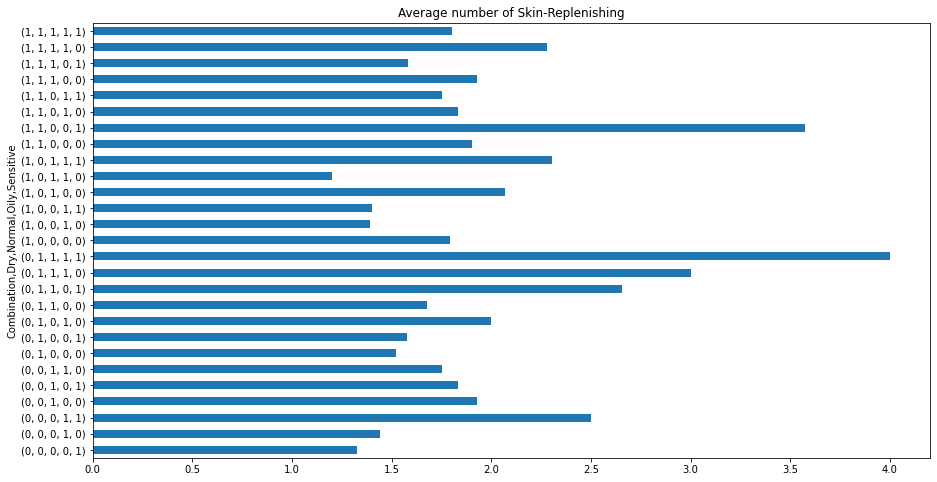

In [155]:
category = data.columns[19:28]
for category in category:
    plot = data.groupby(s_type)[category].mean().plot.barh(figsize = (15, 8))
    plt.title("Average number of " + category[7:])
    plt.savefig(category[7:] + ".png")
